![](../storage/banners/15_dynamics.png)

##### <u>Инициализация</u>

In [1]:
from common_func import *

w = kf.get_vars("w", 3, numb=False)
q = kf.vec2quat(kf.get_vars(name='q', n=3, numb=False))

Инициализация проекта kiam-formation | Контекст: kiamformation
Используйте следующим способом: import kiamformation as kf
Параметры не могут быть загружены! Нет файла: kiamformation/data/config_choose.csv
Матрицы Ф:(6, 6), Q:(3, 3), P:(6, 6), D:(6, 3)


##### <u>Матрицы поворота</u>

In [4]:
kf.my_print(f"Матрица A ИСК->ССК:")
display(A)
print(f"Матрица U ИСК->ОСК:")
display(U)
print(f"Матрица S ОСК->ССК:")
display(S)

Матрица A ИСК->ССК:


Matrix([
[                             -2*q_y**2 - 2*q_z**2 + 1,  2*q_x*q_y + 2*q_z*sqrt(-q_x**2 - q_y**2 - q_z**2 + 1), 2*q_x*q_z - 2*q_y*sqrt(-q_x**2 - q_y**2 - q_z**2 + 1)],
[2*q_x*q_y - 2*q_z*sqrt(-q_x**2 - q_y**2 - q_z**2 + 1),                               -2*q_x**2 - 2*q_z**2 + 1, 2*q_x*sqrt(-q_x**2 - q_y**2 - q_z**2 + 1) + 2*q_y*q_z],
[2*q_x*q_z + 2*q_y*sqrt(-q_x**2 - q_y**2 - q_z**2 + 1), -2*q_x*sqrt(-q_x**2 - q_y**2 - q_z**2 + 1) + 2*q_y*q_z,                              -2*q_x**2 - 2*q_y**2 + 1]])

Матрица U ИСК->ОСК:


Matrix([
[-sin(t*w_0), cos(t*w_0), 0],
[          0,          0, 1],
[ cos(t*w_0), sin(t*w_0), 0]])

Матрица S ОСК->ССК:


Matrix([
[                               (2*q_x*q_y + 2*q_z*sqrt(-q_x**2 - q_y**2 - q_z**2 + 1))*cos(t*w_0) - (-2*q_y**2 - 2*q_z**2 + 1)*sin(t*w_0), 2*q_x*q_z - 2*q_y*sqrt(-q_x**2 - q_y**2 - q_z**2 + 1),                               (2*q_x*q_y + 2*q_z*sqrt(-q_x**2 - q_y**2 - q_z**2 + 1))*sin(t*w_0) + (-2*q_y**2 - 2*q_z**2 + 1)*cos(t*w_0)],
[                              -(2*q_x*q_y - 2*q_z*sqrt(-q_x**2 - q_y**2 - q_z**2 + 1))*sin(t*w_0) + (-2*q_x**2 - 2*q_z**2 + 1)*cos(t*w_0), 2*q_x*sqrt(-q_x**2 - q_y**2 - q_z**2 + 1) + 2*q_y*q_z,                               (2*q_x*q_y - 2*q_z*sqrt(-q_x**2 - q_y**2 - q_z**2 + 1))*cos(t*w_0) + (-2*q_x**2 - 2*q_z**2 + 1)*sin(t*w_0)],
[-(2*q_x*q_z + 2*q_y*sqrt(-q_x**2 - q_y**2 - q_z**2 + 1))*sin(t*w_0) + (-2*q_x*sqrt(-q_x**2 - q_y**2 - q_z**2 + 1) + 2*q_y*q_z)*cos(t*w_0),                              -2*q_x**2 - 2*q_y**2 + 1, (2*q_x*q_z + 2*q_y*sqrt(-q_x**2 - q_y**2 - q_z**2 + 1))*cos(t*w_0) + (-2*q_x*sqrt(-q_x**2 - q_y**2 - q_z**2 + 1) + 2*q_y*q_z)*si

##### <u>Компоненты производной угловой скорости</u>

In [23]:
M = 3 * μ / R_0**5 * (S @ R_orb).cross(J @ S @ R_orb)
w = Matrix(kf.get_func("w", 3, numb=False, t=t))
dw = Matrix(kf.get_func("dw", 3, numb=False, t=t))

w_diff = J.inv() @ (- (w).cross(J @ w) + M)
w_diff = A.T @ J.inv() @ (- (A @ w).cross(J @ A @ w) + M)

In [ ]:
print(f"Разложение по Тейлору:")
display(w_diff[0].subs([(w[0], w[0]+dw[0])]).diff(dw[0]).expand())

##### <u>Линеаризация уравнений движения</u>

In [3]:
r = get_func("r", 3, numb=False)
v = get_func("v", 3, numb=False)
q = get_func("q", 3, numb=False)
w = get_func("w", 3, numb=False)
q0 = 1 - sqrt(q[0]**2 + q[1]**2 + q[2]**2)

M = 3 * μ / R_0**5 * (S @ R_orb).cross(J @ S @ R_orb)
w_diff = A.T @ J.inv() @ (- (A @ Matrix(w)).cross(J @ A @ Matrix(w)) + M)

state_vector = r + q + v + w
motion_equations = [Eq(r[0].diff(t), v[0]),
                    Eq(r[1].diff(t), v[1]),
                    Eq(r[2].diff(t), v[2]),
                    # Eq(q[0].diff(t), (-w[0]*q[1] - w[1]*q[2] - w[2]*q[3])/2),
                    Eq(q[0].diff(t), (w[0]*q0 + w[1]*q[2] - w[2]*q[1])/2),
                    Eq(q[1].diff(t), (w[1]*q0 + w[2]*q[0] - w[0]*q[2])/2),
                    Eq(q[2].diff(t), (w[2]*q0 + w[0]*q[1] - w[1]*q[0])/2),
                    Eq(v[0].diff(t), -2*w_0 * v[2]),
                    Eq(v[1].diff(t), -w_0**2 * r[1]),
                    Eq(v[2].diff(t), 2*w_0 * v[0] + 3*w_0**2 * r[2]),
                    Eq(w[0].diff(t), (J.inv() @ (- Matrix(w).cross(J @ Matrix(w)) + Matrix(M)))[0]),
                    Eq(w[1].diff(t), (J.inv() @ (- Matrix(w).cross(J @ Matrix(w)) + Matrix(M)))[1]),
                    Eq(w[2].diff(t), (J.inv() @ (- Matrix(w).cross(J @ Matrix(w)) + Matrix(M)))[2])]
motion_derivs = [expr.rhs for expr in motion_equations]

def get_linearized_component(i_exp: int, i_var: int):
    anw = motion_derivs[i_exp].diff(state_vector[i_var])
    sv = state_vector.copy()
    sv.remove(state_vector[i_var])
    for i in sv:
        if anw.diff(i) != 0:
            return 0
    '''for i in state_vector:
        if anw.diff(i) != zero:
            anw -= anw.diff(i) * i'''
    return anw

print(f"Линеаризованная матрица Ф:")
Ф = Matrix(np.zeros((len(motion_equations), len(state_vector))))
for i in range(len(motion_equations)):
    for j in range(len(state_vector)):
        Ф[i, j] = get_linearized_component(i, j)
Ф

Линеаризованная матрица Ф:


Matrix([
[0,       0,        0, 0, 0, 0,     1, 0,      0, 0, 0, 0],
[0,       0,        0, 0, 0, 0,     0, 1,      0, 0, 0, 0],
[0,       0,        0, 0, 0, 0,     0, 0,      1, 0, 0, 0],
[0,       0,        0, 0, 0, 0,     0, 0,      0, 0, 0, 0],
[0,       0,        0, 0, 0, 0,     0, 0,      0, 0, 0, 0],
[0,       0,        0, 0, 0, 0,     0, 0,      0, 0, 0, 0],
[0,       0,        0, 0, 0, 0,     0, 0, -2*w_0, 0, 0, 0],
[0, -w_0**2,        0, 0, 0, 0,     0, 0,      0, 0, 0, 0],
[0,       0, 3*w_0**2, 0, 0, 0, 2*w_0, 0,      0, 0, 0, 0],
[0,       0,        0, 0, 0, 0,     0, 0,      0, 0, 0, 0],
[0,       0,        0, 0, 0, 0,     0, 0,      0, 0, 0, 0],
[0,       0,        0, 0, 0, 0,     0, 0,      0, 0, 0, 0]])

##### <u>Генерация файла</u> `H_matrix.py` <u>(матрица H)</u>

In [5]:
r1 = kf.get_vars("r1", 3, numb=False)
r2 = kf.get_vars("r2", 3, numb=False)

q1 = kf.vec2quat(kf.get_vars(name='q1', n=3, numb=False))
q2 = kf.vec2quat(kf.get_vars(name='q2', n=3, numb=False))
_, S1, A1, _ = kf.get_matrices(v=o.v, t=t, q=q1)
_, S2, A2, _ = kf.get_matrices(v=o.v, t=t, q=q2)

r1_brf = S1 @ (r1-r2)
r2_brf = S2 @ (r2-r1)

$\newcommand{bd}[]{\boldsymbol}$

$$\bd{H}=\begin{bmatrix} 
\bd{H}^{cd}_{1,1} & \bd{H}^{cd}_{1,2} & ... & ... & \bd{H}^{cd}_{1,N} \\
... & ... & ... & ... & ... \\
\bd{H}^{cd}_{M,1} & \bd{H}^{cd}_{M,2} & ... & ... & \bd{H}^{cd}_{M,N} \\
- & - & - & - &  - \\
\bd{H}^{dd}_{1,2} & \bd{H}^{dd}_{1,2} & O_{N \times L_x} & ... & O_{N \times L_x} \\
\bd{H}^{dd}_{1,3} & O_{N \times L_x} & \bd{H}^{dd}_{1,3} & ... & O_{N \times L_x} \\
... & ... & ... & ... & ... \\
O_{N \times L_x} & O_{N \times L_x} & O_{N \times L_x} & ... & \bd{H}^{dd}_{N-1,N} \\
\end{bmatrix},$$

$$\bd{H}^{cd}_{1,1 \hskip10px (NL_z^c\times6/13)}=
\begin{bmatrix} 
\bd{H}^{cd}_{1,1} (1) \\
... \\
\bd{H}^{cd}_{1,1} (N) \\
\end{bmatrix},
\hskip15px
\bd{H}^{dd}_{1,1 \hskip10px (NL_z^d\times6/13)}=
\begin{bmatrix} 
\bd{H}^{dd}_{1,1} (1) \\
... \\
\bd{H}^{dd}_{1,1} (N) \\
\end{bmatrix},$$

Если рашется задача оценки орбитального движения (angles_navigation==False):
$$\bd{H}^{cd}_{1,1 \hskip10px (L_z^c\times6)} (1)=\begin{bmatrix} 
\frac{x^{cd}_{1,1}}{r^{cd}_{1,1}} & \frac{y^{cd}_{1,1}}{r^{cd}_{1,1}} & \frac{z^{cd}_{1,1}}{r^{cd}_{1,1}} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0  \\
... \\
0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix},$$

$$\bd{H}^{dd}_{1,2 \hskip10px (L_z^d\times6)} (2)=\begin{bmatrix} 
0 & 0 & 0 & 0 & 0 & 0  \\
\frac{x^{dd}_{1,2}}{r^{dd}_{1,2}} & \frac{y^{dd}_{1,2}}{r^{dd}_{1,2}} & \frac{z^{dd}_{1,2}}{r^{dd}_{1,2}} & 0 & 0 & 0 \\
... \\
0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}.$$

В случае орбитального и углового движения (angles_navigation==True):
$$\bd{H}^{cd}_{1,1 \hskip10px (L_z^c\times13)} (1) = 
\begin{bmatrix} 
\frac{x^{cd}_{1,1}}{r^{cd}_{1,1}\sqrt{G^{cd}_{1,1}G^{dc}_{1,1}}} & \frac{y^{cd}_{1,1}}{r^{cd}_{1,1}\sqrt{G^{cd}_{1,1}G^{dc}_{1,1}}} & \frac{z^{cd}_{1,1}}{r^{cd}_{1,1}\sqrt{G^{cd}_{1,1}G^{dc}_{1,1}}} &|& h_1^1 & h_2^1 & h_3^1 & h_4^1  &|& 0 & 0 & 0 &|& 0 & 0 & 0 \\
0 & 0 & 0 &|& h_1^2 & h_2^2 & h_3^2 & h_4^2  &|& 0 & 0 & 0 &|& 0 & 0 & 0  \\
... & ... & ... &|& ... & ... & ... & ...  &|& . & . & . &|& . & . & . \\
0 & 0 & 0 &|& h_1^{L_z^c} & h_2^{L_z^c} & h_3^{L_z^c} & h_4^{L_z^c}  &|& 0 & 0 & 0 &|& 0 & 0 & 0  \\
\end{bmatrix},$$

$$\bd{H}^{dd}_{1,2 \hskip10px (L_z^d\times13)} (2)=\begin{bmatrix} 
0 & 0 & 0 &|& h_1^1 & h_2^1 & h_3^1 & h_4^1  &|& 0 & 0 & 0 &|& 0 & 0 & 0  \\
\frac{x^{dd}_{1,2}}{r^{dd}_{1,2}\sqrt{G^{dd}_{1,2}G^{dd}_{2,1}}} & \frac{y^{dd}_{1,2}}{r^{dd}_{1,2}\sqrt{G^{dd}_{1,2}G^{dd}_{2,1}}} & \frac{z^{dd}_{1,2}}{r^{dd}_{1,2}\sqrt{G^{dd}_{1,2}G^{dd}_{2,1}}} &|& h_1^2 & h_2^2 & h_3^2 & h_4^2  &|& 0 & 0 & 0 &|& 0 & 0 & 0 \\
... & ... & ... &|& ... & ... & ... & ...  &|& . & . & . &|& . & . & . \\
0 & 0 & 0 &|& h_1^{L_z^d} & h_2^{L_z^d} & h_3^{L_z^d} & h_4^{L_z^d}  &|& 0 & 0 & 0 &|& 0 & 0 & 0  \\
\end{bmatrix}.$$

###### Упрощение генерируемого файла. Замена выражений

In [17]:
swt, cwt = var("swt cwt")
s1_11, s1_12, s1_13, s1_21, s1_22, s1_23, s1_31, s1_32, s1_33 = var("s1_11 s1_12 s1_13 s1_21 s1_22 s1_23 s1_31 s1_32 s1_33")
s2_11, s2_12, s2_13, s2_21, s2_22, s2_23, s2_31, s2_32, s2_33 = var("s2_11 s2_12 s2_13 s2_21 s2_22 s2_23 s2_31 s2_32 s2_33")
r1_x, r1_y, r1_z, r2_x, r2_y, r2_z, r12x, r12y, r12z, r12 = var("r1_x r1_y r1_z r2_x r2_y r2_z r12x r12y r12z r12")
s1_x_r12, s1_y_r12, s1_z_r12, s2_x_r12, s2_y_r12, s2_z_r12, s1_r12, s2_r12 = var("s1_x_r12 s1_y_r12 s1_z_r12 s2_x_r12 s2_y_r12 s2_z_r12 s1_r12 s2_r12")
s1_xyx, s1_xy, s1_yz, s1_xz, s2_xyx, s2_xy, s2_yz, s2_xz, s2_yz_2, s2_xz_2 = var("s1_xyx s1_xy s1_yz s1_xz s2_xyx s2_xy s2_yz s2_xz  s2_yz_2 s2_xz_2")
s1_xyx_2, s1_xy_2, s1_yz_2, s1_xz_2, s2_xyx_2, s2_xy_2, s2_yz_2, s2_xz_2 = var("s1_xyx_2 s1_xy_2 s1_yz_2 s1_xz_2 s2_xyx_2 s2_xy_2 s2_yz_2 s2_xz_2")
c_s1_x, c_s1_y, c_s1_z, c_s2_x, c_s2_y, c_s2_z = var("c_s1_x c_s1_y c_s1_z c_s2_x c_s2_y c_s2_z")
s1_r12_2, s2_r12_2, s1_xyx, s1_xy, s1_yz, s1_xz, s2_xyx, s2_xy, s2_yz, s2_xz = var("s1_r12_2 s2_r12_2 s1_xyx s1_xy s1_yz s1_xz s2_xyx s2_xy s2_yz s2_xz")
s1_xyx_2, s1_xy_2, s1_yz_2, s1_xz_2, s2_xyx_2, s2_xy_2, s2_yz_2, s2_xz_2 = var("s1_xyx_2 s1_xy_2 s1_yz_2 s1_xz_2 s2_xyx_2 s2_xy_2 s2_yz_2 s2_xz_2")
q1_y_z2, q1_x_z2, q1_0z_xy1, q1_0z_xy2, q1_0y_xz1, q1_0x_yz2, q2_y_z2, q2_x_z2, q2_0z_xy1, q2_0z_xy2, q2_0y_xz1, q2_0x_yz2 = var("q1_y_z2 q1_x_z2 q1_0z_xy1 q1_0z_xy2 q1_0y_xz1 q1_0x_yz2 q2_y_z2 q2_x_z2 q2_0z_xy1 q2_0z_xy2 q2_0y_xz1 q2_0x_yz2")
c_s1_xr12_xyx = var("c_s1_xr12_xyx")
t001, t002, t003, t004, t005, t006 = var("t001 t002 t003 t004 t005 t006")

sublist = [(S1[0,0], s1_11), (S1[0,1], s1_12), (S1[0,2], s1_13), 
           (S1[1,0], s1_21), (S1[1,1], s1_22), (S1[1,2], s1_23), 
           (S1[2,0], s1_31), (S1[2,1], s1_32), (S1[2,2], s1_33), 
           (S2[0,0], s2_11), (S2[0,1], s2_12), (S2[0,2], s2_13), 
           (S2[1,0], s2_21), (S2[1,1], s2_22), (S2[1,2], s2_23), 
           (S2[2,0], s2_31), (S2[2,1], s2_32), (S2[2,2], s2_33),
           (sin(t*w_0), swt), (cos(t*w_0), cwt)]

def my_simplify(expr, angles_navigation) -> list:
    txt = str(expr.subs(sublist)) if angles_navigation else str(expr)

    txt = txt.replace("r1_x - r2_x", "r12x")
    txt = txt.replace("-r1_x + r2_x", "-r12x")
    txt = txt.replace("r1_y - r2_y", "r12y")
    txt = txt.replace("-r1_y + r2_y", "-r12y")
    txt = txt.replace("r1_z - r2_z", "r12z")
    txt = txt.replace("-r1_z + r2_z", "-r12z")
    txt = txt.replace("sqrt(r12x**2 + r12y**2 + r12z**2)", "r12")
    txt = txt.replace("sqrt((r12x)**2 + (r12y)**2 + (r12z)**2)", "r12")

    if angles_navigation:
        # ПРОВЕРИТЬ ДОСКОНАЛЬНО      2*q1_0*q1_y + 2*q1_x*q1_z
        txt = txt.replace("1 - sqrt(q1_x**2 + q1_y**2 + q1_z**2)", "q1_0")
        txt = txt.replace("1 - sqrt(q2_x**2 + q2_y**2 + q2_z**2)", "q2_0")
            
        txt = txt.replace("cwt*(2*q2_0*q2_z + 2*q2_x*q2_y) - swt*(-2*q2_y**2 - 2*q2_z**2 + 1)", "s2_11")
        txt = txt.replace("-2*q2_0*q2_y + 2*q2_x*q2_z", "s2_12")
        txt = txt.replace("cwt*(-2*q2_y**2 - 2*q2_z**2 + 1) + swt*(2*q2_0*q2_z + 2*q2_x*q2_y)", "s2_13")
        
        txt = txt.replace("cwt*(-2*q2_x**2 - 2*q2_z**2 + 1) - swt*(-2*q2_0*q2_z + 2*q2_x*q2_y)", "s2_21")
        txt = txt.replace("2*q2_0*q2_x + 2*q2_y*q2_z", "s2_22")
        txt = txt.replace("cwt*(-2*q2_0*q2_z + 2*q2_x*q2_y) + swt*(-2*q2_x**2 - 2*q2_z**2 + 1)", "s2_23")
        
        txt = txt.replace("cwt*(-2*q2_0*q2_x + 2*q2_y*q2_z) - swt*(2*q2_0*q2_y + 2*q2_x*q2_z)", "s2_31")
        txt = txt.replace("-2*q2_x**2 - 2*q2_y**2 + 1", "s2_32")
        txt = txt.replace("cwt*(2*q2_0*q2_y + 2*q2_x*q2_z) + swt*(-2*q2_0*q2_x + 2*q2_y*q2_z)", "s2_33")

        txt = txt.replace("cwt*(2*q1_0*q1_z + 2*q1_x*q1_y) - swt*(-2*q1_y**2 - 2*q1_z**2 + 1)", "s1_11")
        txt = txt.replace("-2*q1_0*q1_y + 2*q1_x*q1_z", "s1_12")
        txt = txt.replace("cwt*(-2*q1_y**2 - 2*q1_z**2 + 1) + swt*(2*q1_0*q1_z + 2*q1_x*q1_y)", "s1_13")
        
        txt = txt.replace("cwt*(-2*q1_x**2 - 2*q1_z**2 + 1) - swt*(-2*q1_0*q1_z + 2*q1_x*q1_y)", "s1_21")
        txt = txt.replace("2*q1_0*q1_x + 2*q1_y*q1_z", "s1_22")
        txt = txt.replace("cwt*(-2*q1_0*q1_z + 2*q1_x*q1_y) + swt*(-2*q1_x**2 - 2*q1_z**2 + 1)", "s1_23")
        
        txt = txt.replace("cwt*(-2*q1_0*q1_x + 2*q1_y*q1_z) - swt*(2*q1_0*q1_y + 2*q1_x*q1_z)", "s1_31")
        txt = txt.replace("-2*q1_x**2 - 2*q1_y**2 + 1", "s1_32")
        txt = txt.replace("cwt*(2*q1_0*q1_y + 2*q1_x*q1_z) + swt*(-2*q1_0*q1_x + 2*q1_y*q1_z)", "s1_33")
        
        txt = txt.replace("s1_11*(r12x) + s1_12*(r12y) + s1_13*(r12z)", "s1_x_r12")
        txt = txt.replace("s1_21*(r12x) + s1_22*(r12y) + s1_23*(r12z)", "s1_y_r12")
        txt = txt.replace("s1_31*(r12x) + s1_32*(r12y) + s1_33*(r12z)", "s1_x_r12")
        txt = txt.replace("s2_11*(r12x) + s2_12*(r12y) + s2_13*(r12z)", "s2_x_r12")
        txt = txt.replace("s2_21*(r12x) + s2_22*(r12y) + s2_23*(r12z)", "s2_y_r12")
        txt = txt.replace("s2_31*(r12x) + s2_32*(r12y) + s2_33*(r12z)", "s2_z_r12")
        
        txt = txt.replace("s1_11*(-r12x) + s1_12*(-r12y) + s1_13*(-r12z)", "-s1_x_r12")
        txt = txt.replace("s1_21*(-r12x) + s1_22*(-r12y) + s1_23*(-r12z)", "-s1_y_r12")
        txt = txt.replace("s1_31*(-r12x) + s1_32*(-r12y) + s1_33*(-r12z)", "-s1_x_r12")
        txt = txt.replace("s2_11*(-r12x) + s2_12*(-r12y) + s2_13*(-r12z)", "-s2_x_r12")
        txt = txt.replace("s2_21*(-r12x) + s2_22*(-r12y) + s2_23*(-r12z)", "-s2_y_r12")
        txt = txt.replace("s2_31*(-r12x) + s2_32*(-r12y) + s2_33*(-r12z)", "-s2_z_r12")
        
        txt = txt.replace("sqrt((s1_x_r12)**2 + (s1_y_r12)**2 + (s1_z_r12)**2)", "s1_r12")
        txt = txt.replace("sqrt((s2_x_r12)**2 + (s2_y_r12)**2 + (s2_z_r12)**2)", "s2_r12")
        txt = txt.replace("sqrt((-s1_x_r12)**2 + (-s1_y_r12)**2 + (-s1_z_r12)**2)", "s1_r12")
        txt = txt.replace("sqrt((-s2_x_r12)**2 + (-s2_y_r12)**2 + (-s2_z_r12)**2)", "s2_r12")
        
        txt = txt.replace("((s1_x_r12)**2 + (s1_y_r12)**2 + (s1_z_r12)**2)", "s1_r12_2")
        txt = txt.replace("((s2_x_r12)**2 + (s2_y_r12)**2 + (s2_z_r12)**2)", "s2_r12_2")
        txt = txt.replace("((-s1_x_r12)**2 + (-s1_y_r12)**2 + (-s1_z_r12)**2)", "s1_r12_2")
        txt = txt.replace("((-s2_x_r12)**2 + (-s2_y_r12)**2 + (-s2_z_r12)**2)", "s2_r12_2")
        
        txt = txt.replace("sqrt((s1_x_r12)**2 + (s1_y_r12)**2 + (s1_x_r12)**2)", "s1_xyx")
        txt = txt.replace("sqrt((s1_x_r12)**2 + (s1_y_r12)**2)", "s1_xy") 
        txt = txt.replace("sqrt((s1_y_r12)**2 + (s1_z_r12)**2)", "s1_yz")
        txt = txt.replace("sqrt((s1_x_r12)**2 + (s1_z_r12)**2)", "s1_xz")
        txt = txt.replace("sqrt((s1_y_r12)**2 + (s1_x_r12)**2)", "s1_xy")
        txt = txt.replace("sqrt((s1_z_r12)**2 + (s1_y_r12)**2)", "s1_yz")
        txt = txt.replace("sqrt((s1_z_r12)**2 + (s1_x_r12)**2)", "s1_xz")
        txt = txt.replace("sqrt((s2_x_r12)**2 + (s2_y_r12)**2 + (s2_x_r12)**2)", "s2_xyx")
        txt = txt.replace("sqrt((s2_x_r12)**2 + (s2_y_r12)**2)", "s2_xy")
        txt = txt.replace("sqrt((s2_y_r12)**2 + (s2_z_r12)**2)", "s2_yz")
        txt = txt.replace("sqrt((s2_x_r12)**2 + (s2_z_r12)**2)", "s2_xz")
        txt = txt.replace("sqrt((s2_y_r12)**2 + (s2_x_r12)**2)", "s2_xy")
        txt = txt.replace("sqrt((s2_z_r12)**2 + (s2_y_r12)**2)", "s2_yz")
        txt = txt.replace("sqrt((s2_z_r12)**2 + (s2_x_r12)**2)", "s2_xz")
        txt = txt.replace("sqrt((-s1_x_r12)**2 + (-s1_y_r12)**2 + (-s1_x_r12)**2)", "s1_xyx")
        txt = txt.replace("sqrt((-s1_x_r12)**2 + (-s1_y_r12)**2)", "s1_xy")
        txt = txt.replace("sqrt((-s1_y_r12)**2 + (-s1_z_r12)**2)", "s1_yz")
        txt = txt.replace("sqrt((-s1_x_r12)**2 + (-s1_z_r12)**2)", "s1_xz")
        txt = txt.replace("sqrt((-s1_y_r12)**2 + (-s1_x_r12)**2)", "s1_xy")
        txt = txt.replace("sqrt((-s1_z_r12)**2 + (-s1_y_r12)**2)", "s1_yz")
        txt = txt.replace("sqrt((-s1_z_r12)**2 + (-s1_x_r12)**2)", "s1_xz")
        txt = txt.replace("sqrt((-s2_x_r12)**2 + (-s2_y_r12)**2 + (s2_x_r12)**2)", "s2_xyx")
        txt = txt.replace("sqrt((-s2_y_r12)**2 + (-s2_x_r12)**2)", "s2_xy")
        txt = txt.replace("sqrt((-s2_z_r12)**2 + (-s2_y_r12)**2)", "s2_yz")
        txt = txt.replace("sqrt((-s2_z_r12)**2 + (-s2_x_r12)**2)", "s2_xz")
        txt = txt.replace("sqrt((-s2_y_r12)**2 + (-s2_z_r12)**2)", "s2_yz")
    
        
        txt = txt.replace("((s1_x_r12)**2 + (s1_y_r12)**2 + (s1_x_r12)**2)", "s1_xyx_2")
        txt = txt.replace("((s1_x_r12)**2 + (s1_y_r12)**2)", "s1_xy_2")
        txt = txt.replace("((s1_y_r12)**2 + (s1_z_r12)**2)", "s1_yz_2")
        txt = txt.replace("((s1_x_r12)**2 + (s1_z_r12)**2)", "s1_xz_2")
        txt = txt.replace("((s1_y_r12)**2 + (s1_x_r12)**2)", "s1_xy_2")
        txt = txt.replace("((s1_z_r12)**2 + (s1_y_r12)**2)", "s1_yz_2")
        txt = txt.replace("((s1_z_r12)**2 + (s1_x_r12)**2)", "s1_xz_2")
        txt = txt.replace("((s2_x_r12)**2 + (s2_y_r12)**2 + (s2_x_r12)**2)", "s2_xyx_2")
        txt = txt.replace("((s2_x_r12)**2 + (s2_y_r12)**2)", "s2_xy_2")
        txt = txt.replace("((s2_y_r12)**2 + (s2_z_r12)**2)", "s2_yz_2")
        txt = txt.replace("((s2_x_r12)**2 + (s2_z_r12)**2)", "s2_xz_2")
        txt = txt.replace("((s2_y_r12)**2 + (s2_x_r12)**2)", "s2_xy_2")
        txt = txt.replace("((s2_z_r12)**2 + (s2_y_r12)**2)", "s2_yz_2")
        txt = txt.replace("((s2_z_r12)**2 + (s2_x_r12)**2)", "s2_xz_2")
        txt = txt.replace("((-s1_x_r12)**2 + (-s1_y_r12)**2 + (-s1_x_r12)**2)", "s1_xyx_2")
        txt = txt.replace("((-s1_x_r12)**2 + (-s1_y_r12)**2)", "s1_xy_2")
        txt = txt.replace("((-s1_y_r12)**2 + (-s1_z_r12)**2)", "s1_yz_2")
        txt = txt.replace("((-s1_x_r12)**2 + (-s1_z_r12)**2)", "s1_xz_2")
        txt = txt.replace("((-s1_y_r12)**2 + (-s1_x_r12)**2)", "s1_xy_2")
        txt = txt.replace("((-s1_z_r12)**2 + (-s1_y_r12)**2)", "s1_yz_2")
        txt = txt.replace("((-s1_z_r12)**2 + (-s1_x_r12)**2)", "s1_xz_2")
        txt = txt.replace("((-s2_x_r12)**2 + (-s2_y_r12)**2 + (s2_x_r12)**2)", "s2_xyx_2")
        txt = txt.replace("((-s2_y_r12)**2 + (-s2_x_r12)**2)", "s2_xy_2")
        txt = txt.replace("((-s2_z_r12)**2 + (-s2_y_r12)**2)", "s2_yz_2")
        txt = txt.replace("((-s2_z_r12)**2 + (-s2_x_r12)**2)", "s2_xz_2")

        txt = txt.replace("-2*q1_y**2 - 2*q1_z**2 + 1", "q1_y_z2")
        txt = txt.replace("-2*q1_x**2 - 2*q1_z**2 + 1", "q1_x_z2")
        txt = txt.replace("2*q1_0*q1_z + 2*q1_x*q1_y", "q1_0z_xy1")
        txt = txt.replace("-2*q1_0*q1_z + 2*q1_x*q1_y", "q1_0z_xy2")
        txt = txt.replace("2*q1_0*q1_y + 2*q1_x*q1_z", "q1_0y_xz1")
        txt = txt.replace("-2*q1_0*q1_x + 2*q1_y*q1_z", "q1_0x_yz2")
        
        txt = txt.replace("-2*q2_y**2 - 2*q2_z**2 + 1", "q2_y_z2")
        txt = txt.replace("-2*q2_x**2 - 2*q2_z**2 + 1", "q2_x_z2")
        txt = txt.replace("2*q2_0*q2_z + 2*q2_x*q2_y", "q2_0z_xy1")
        txt = txt.replace("-2*q2_0*q2_z + 2*q2_x*q2_y", "q2_0z_xy2")
        txt = txt.replace("2*q2_0*q2_y + 2*q2_x*q2_z", "q2_0y_xz1")
        txt = txt.replace("-2*q2_0*q2_x + 2*q2_y*q2_z", "q2_0x_yz2")
        
        txt = txt.replace("cos(pi*(-s2_x_r12)/(2*s2_r12))", "c_s2_x")
        txt = txt.replace("cos(pi*(s2_x_r12)/(2*s2_r12))", "c_s2_x")
        txt = txt.replace("cos(pi*(-s2_y_r12)/(2*s2_r12))", "c_s2_y")
        txt = txt.replace("cos(pi*(s2_y_r12)/(2*s2_r12))", "c_s2_y")
        txt = txt.replace("cos(pi*(-s2_z_r12)/(2*s2_r12))", "c_s2_z")
        txt = txt.replace("cos(pi*(s2_z_r12)/(2*s2_r12))", "c_s2_z")
        txt = txt.replace("cos(pi*(-s1_x_r12)/(2*s1_r12))", "c_s1_x")
        txt = txt.replace("cos(pi*(s1_x_r12)/(2*s1_r12))", "c_s1_x")
        txt = txt.replace("cos(pi*(-s1_y_r12)/(2*s1_r12))", "c_s1_y")
        txt = txt.replace("cos(pi*(s1_y_r12)/(2*s1_r12))", "c_s1_y")
        txt = txt.replace("cos(pi*(-s1_z_r12)/(2*s1_r12))", "c_s1_z")
        txt = txt.replace("cos(pi*(s1_z_r12)/(2*s1_r12))", "c_s1_z")

        # Тут могут быть ещё "сущности"
        txt = txt.replace("cos(pi*(s1_x_r12)/(2*s1_xyx))", "c_s1_xr12_xyx")

    # expr_ = eval(txt)
    # txt = str(expr_.simplify())
    txt = str(eval(txt))

    if angles_navigation:
        # После стрэвальный треш!
        txt = txt.replace("-2*cwt*q1_0z_xy1 + 2*q1_y_z2*swt", "t001")
        txt = txt.replace("2*cwt*q1_0z_xy1 - 2*q1_y_z2*swt", "-t001")
        txt = txt.replace("2*cwt*q1_x_z2 + 2*q1_0z_xy1*swt", "t002")
        txt = txt.replace("-2*cwt*q1_x_z2 - 2*q1_0z_xy1*swt", "-t002")
        txt = txt.replace("2*cwt*s1_22 + 2*q1_0y_xz1*swt", "t003")
        txt = txt.replace("-2*cwt*s1_22 - 2*q1_0y_xz1*swt", "t003")
        txt = txt.replace("-2*cwt*q2_0z_xy1 + 2*q2_y_z2*swt", "t004")
        txt = txt.replace("2*cwt*q2_0z_xy1 - 2*q2_y_z2*swt", "-t004")
        txt = txt.replace("2*cwt*q2_x_z2 + 2*q2_0z_xy1*swt", "t005")
        txt = txt.replace("-2*cwt*q2_x_z2 - 2*q2_0z_xy1*swt", "-t005")
        txt = txt.replace("2*cwt*s2_22 + 2*q2_0y_xz1*swt", "t006")
        txt = txt.replace("-2*cwt*s2_22 - 2*q2_0y_xz1*swt", "t006")

        txt = txt.replace("sqrt(q1_x**2 + q1_y**2 + q1_z**2)", "1 - q1_0")
        txt = txt.replace("sqrt(q2_x**2 + q2_y**2 + q2_z**2)", "1 - q2_0")
    
    return txt

###### Генерация файла `H_matrix`

In [19]:
f = open('storage/H_matrix.py', 'w')

# cf {i_c} {i_f} {jj} {ii} {send_len} {take_len}

# >>>>>>>>>>>> Элемент матрицы H <<<<<<<<<<<<
with open('storage/docking_H_element_matrix.py', 'r') as s:
    f.write(s.read())

for angles_navigation in [False, True]:
    for i_all, dirs_1 in enumerate('xy'):  # 3 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        for j_all, dirs_2 in enumerate('xy'):  # 3 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            G1 = [local_dipole(r1_brf, a) for a in dirs_1]
            G2 = [local_dipole(r2_brf, a) for a in dirs_2]

            for multy_antenna_send in [False, True]:
                for multy_antenna_take in [False, True]:
                    # Case 1
                    if not multy_antenna_send and not multy_antenna_take:  
                        G12 = [sum(G1)*sum(G2)]*2  # ПРОВЕРИТЬ: модель суммы сигналов
                        glen = 2
                    # Case 2
                    if multy_antenna_send and not multy_antenna_take:  
                        G12 = flatten([g_1*sum(G2) for g_1 in G1] + [sum(G1)*g_2 for g_2 in G2])
                        glen = (i_all+1) + (j_all+1)
                    # Case 3
                    if not multy_antenna_send and multy_antenna_take:  
                        G12 = flatten([g_1*sum(G2) for g_1 in G1] + [sum(G1)*g_2 for g_2 in G2])
                        glen = (i_all+1) + (j_all+1)
                    # Case 4
                    if multy_antenna_send and multy_antenna_take:  
                        G12 = flatten([flatten([[g_1*g_2]*2 for g_1 in G1]) for g_2 in G2])
                        glen = 2 * (i_all+1) * (j_all+1)

                    if angles_navigation:
                        z = [kf.sympy_norm(r1 - r2) / sqrt(G12[ii]) for ii in range(glen)]  # Измерения
                    else:
                        z = [kf.sympy_norm(r1 - r2) for ii in range(glen)]  # Измерения
                        
                    print(f"Матрица частных производных H | КА-1:{dirs_1}, КА-2:{dirs_2} | ang:{angles_navigation} | send:{multy_antenna_send}, take:{multy_antenna_take} | glen={glen}={len(G12)}")
                    
                    for relation in ["cf", "ff"]:
                        txt = f"    if (angles_navigation=={angles_navigation}) and (i_all=={i_all+1}) and (j_all=={j_all+1}) "
                        txt += f"and (multy_antenna_send=={multy_antenna_send}) and (multy_antenna_take=={multy_antenna_take}) " 
                        txt += f"and (relation=='{relation}'):\n"
                        txt += f"        return np.array([\n"
                        if angles_navigation:
                            for row in range(glen):
                                if relation == "cf":
                                    cnd = f"*int(i_n==j)*int(i_x==j)"
                                    txt += f"{' '*23}["
                                    for ii in range(3):
                                        txt += f"({my_simplify(z[row].diff(r2[ii]), angles_navigation)}){cnd}, "
                                    for ii in range(3):
                                        txt += f"({my_simplify(z[row].diff(q2[ii]), angles_navigation)}){cnd}, "
                                    txt += f"] + 6*[0],\n"
                                else:
                                    cnd1 = "*int(ff_sequence[i_y][0]==i_x)" # f"*int(i_n==i)*int(i_x==j)*int(ff_sequence[i_y][0]==i_x)"
                                    cnd2 = "*int(ff_sequence[i_y][1]==i_x)" # f"*int(i_n==j)*int(i_x==j)*int(ff_sequence[i_y][1]==i_x)"
                                    txt += f"{' '*23}["
                                    for ii in range(3):
                                        txt += f"({my_simplify(z[row].diff(r1[ii]), angles_navigation)}){cnd1}+({my_simplify(z[row].diff(r2[ii]), angles_navigation)}){cnd2}, "
                                    for ii in range(3):
                                        txt += f"({my_simplify(z[row].diff(q1[ii]), angles_navigation)}){cnd1}+({my_simplify(z[row].diff(q2[ii]), angles_navigation)}){cnd2}, "
                                    txt += f"] + 6*[0],\n"
                        else:
                            for row in range(glen):
                                if relation == "cf":
                                    cnd = f"*int(i_n==j)*int(i_x==j)"
                                    txt += f"{' '*23}["
                                    for ii in range(3):
                                        txt += f"({my_simplify(z[row].diff(r2[ii]), angles_navigation)}){cnd}, "
                                    txt += f"] + 3*[0],\n"
                                else:
                                    cnd1 = "*int(ff_sequence[i_y][0]==i_x)" # f"*int(i_n==i)*int(i_x==j)*int(ff_sequence[i_y][0]==i_x)"
                                    cnd2 = "*int(ff_sequence[i_y][1]==i_x)" # f"*int(i_n==j)*int(i_x==j)*int(ff_sequence[i_y][1]==i_x)"
                                    txt += f"{' '*23}["
                                    for ii in range(3):
                                        txt += f"({my_simplify(z[row].diff(r1[ii]), angles_navigation)}){cnd1}+({my_simplify(z[row].diff(r2[ii]), angles_navigation)}){cnd2}, "
                                    txt += f"] + 3*[0],\n"
                        
                        f.write(txt + f"{' '*23}])\n\n")

# >>>>>>>>>>>> Полная матрица частных производных H <<<<<<<<<<<<
txt = f"\ndef h_matrix(c_ant, f_ant, fn, cn, angles_navigation, r_f, r_c, multy_antenna_send: bool, multy_antenna_take: bool, w_0, t, q_f: list | None, q_c: list | None, return_template: bool = False) -> np.ndarray:\n"
txt += f"    '''Возвращает матрицу частных производных Н.\n"
txt += f"    :param c_ant: Количество антенн у кубсата\n"
txt += f"    :param f_ant: Количество антенн у чипсата\n"
txt += f"    :param fn: Количество чипсатов\n"
txt += f"    :param cn: Количество кубсатов\n"
txt += f"    :param angles_navigation: Оценивается ли вращательное движение\n"
txt += f"    :param r_f: Положения чипсатов\n"
txt += f"    :param r_c: Положения кубсатов\n"
txt += f"    :param multy_antenna_send: Раскладывается ли сигнал при отправке\n"
txt += f"    :param multy_antenna_take: Раскладывается ли сигнал при принятии\n"
txt += f"    :param w_0: Угловая скорость вращения ОСК\n"
txt += f"    :param t: Текущее время\n"
txt += f"    :param q_f: Вектор-часть кватернионов чипсатов (опционально)\n"
txt += f"    :param q_c: Вектор-часть кватернионов кубсатов (опционально)\n"
txt += f"    :return: Матрица частных производных H. Отображение состояния в измерения\n"
txt += f"    '''\n" 
txt += f"    from sympy import var\n\n"

txt += f"    ff_sequence = []  # Последовательность номеров непустых столбцов, длина ff_sequence - кол-во строк нижней подматицы\n"
txt += f"    for i_f1 in range(fn):\n"
txt += f"        for i_f2 in range(i_f1):\n"
txt += f"            if i_f1 != i_f2:\n"
txt += f"                ff_sequence += [[i_f1, i_f2]]\n"
txt += f"    cf_matrix = np.array([])\n"
txt += f"    ff_matrix = np.array([])\n"
txt += f"    for relation in ['cf', 'ff']:\n"
txt += f"        tmp_rows = None\n"
# txt += f"        height = 2*c_ant*f_ant*fn*cn if relation=='cf' else f_ant**2*fn*(fn-1)\n"  # Что тут не так? 
txt += f"        height = cn if relation=='cf' else int(fn*(fn-1)/2)\n"  # Что тут не так?
txt += f"        for i_y in range(height):\n" 
txt += f"            tmp_row = []\n"   
txt += f"            for i_x in range(fn):\n"
txt += f"                tmp_row_col = []\n"
txt += f"                for i_f in range(fn if relation=='cf' else 1):\n" # ВОТ ТУТ ТО СВИНЬЯ И ЗАРЫТА ДАААААААААААААААААААААААААААААААА 
txt += f"                    if relation == 'cf':\n"
txt += f"                        i_1 = i_y\n"   
txt += f"                        i_2 = i_f\n"   
txt += f"                    else:\n"
txt += f"                        i_1 = ff_sequence[i_y][0]\n"   
txt += f"                        i_2 = ff_sequence[i_y][1]\n"  
# txt += "                    print(f'{relation} | i={i_1}, j={i_2}, i_n={i_f}, i_x={i_x}, seq: {ff_sequence[i_y]}')\n"

                        
                    
txt += f"                    if return_template:\n"
txt += f"                        tmp_row_col += [var(relation + '_' + str(i_1) + '^' + str(i_2))]\n"
txt += f"                    else:\n"
txt += f"                        tmp_row_col += [h_element(i_x=i_x, i_y=i_y, i_n=i_f, i=i_1, j=i_2, "
txt += f"i_all=c_ant if relation=='cf' else f_ant, j_all=f_ant, fn=fn, cn=cn, relation=relation, angles_navigation=angles_navigation, "
txt += f"r_f=r_f, r1=r_c[i_1] if relation=='cf' else r_f[i_1], r2=r_f[i_2], "
txt += f"q_f=q_f, q1=q_c[i_1] if relation=='cf' else q_f[i_1], q2=q_f[i_2], "
txt += f"multy_antenna_send=multy_antenna_send, multy_antenna_take=multy_antenna_take, w_0=w_0, t=t)]\n"
txt += f"                    \n"
txt += f"                tmp_row += [np.vstack(tmp_row_col)]\n"
txt += f"            \n"
txt += f"            tmp_row = np.bmat(tmp_row)\n"
txt += f"            tmp_rows = tmp_row if tmp_rows is None else np.vstack([tmp_rows, tmp_row])\n"
txt += f"        \n"
txt += f"        if relation == 'cf':\n"
txt += f"            cf_matrix = tmp_rows\n"
txt += f"        else:\n"
txt += f"            ff_matrix = tmp_rows\n"
txt += f"    \n"
txt += f"    # print('Верхняя подматрица: ' + str(cf_matrix.shape))\n"
txt += f"    if ff_matrix is not None:\n"
txt += f"        # print('Нижняя подматрица: ' + str(ff_matrix.shape))\n"
txt += f"        return np.vstack([cf_matrix, ff_matrix]), cf_matrix, ff_matrix\n"
txt += f"    return cf_matrix, cf_matrix, None\n"
f.write(txt)

f.close()
# talk()

Матрица частных производных H | КА-1:x, КА-2:x | ang:False | send:False, take:False | glen=2=2
Матрица частных производных H | КА-1:x, КА-2:x | ang:False | send:False, take:True | glen=2=2
Матрица частных производных H | КА-1:x, КА-2:x | ang:False | send:True, take:False | glen=2=2
Матрица частных производных H | КА-1:x, КА-2:x | ang:False | send:True, take:True | glen=2=2
Матрица частных производных H | КА-1:x, КА-2:xy | ang:False | send:False, take:False | glen=2=2
Матрица частных производных H | КА-1:x, КА-2:xy | ang:False | send:False, take:True | glen=3=3
Матрица частных производных H | КА-1:x, КА-2:xy | ang:False | send:True, take:False | glen=3=3
Матрица частных производных H | КА-1:x, КА-2:xy | ang:False | send:True, take:True | glen=4=4
Матрица частных производных H | КА-1:xy, КА-2:x | ang:False | send:False, take:False | glen=2=2
Матрица частных производных H | КА-1:xy, КА-2:x | ang:False | send:False, take:True | glen=3=3
Матрица частных производных H | КА-1:xy, КА-2:x | ang

In [14]:
fn = 3
ff_sequence = []
for i_f1 in range(fn):
        for i_f2 in range(fn):
            if i_f1 != i_f2:
                ff_sequence += [[i_f1, i_f2]]
ff_sequence

[[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1]]

### <span style="color:#0ab49a">Исследование</span> <span style="color:#A254FC">режимов вращения</span> 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [83]:
Cf = 1
m = 0.03
a = 0.1
b = 0.1

rho =  5.21e-13
S = a*b
M = 5.972e24
G = 6.6743e-11
mu = M * G
v_orb = np.sqrt(mu / 6900e3)
c = Cf * rho * v_orb**2 * S / 6 * m * (a**2 + a*b + b**2)
c

4.514455893826088e-11

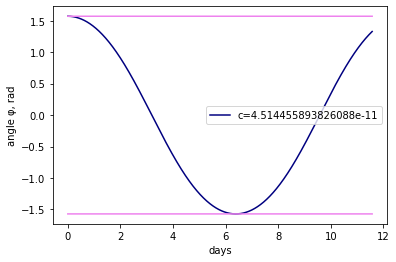

In [91]:
# p = phi
dt = 10.
T = 1e6
days = True

def func(p: float, w: float, c: float, dt: float):
    return p + w * dt, w - dt * c * np.sin(p)

def integrate(c: float, dt: float = 1., T: float = 1000):
    w_list = [0.]
    p_list = [3.1415/2]
    t_list = [0.]
    for i in range(int(round(T / dt))):
        tmp = func(p_list[i], w_list[i], c, dt)
        t_list += [(i+1)*dt]
        p_list += [tmp[0]]
        w_list += [tmp[1]]
    return t_list, p_list

t, p = integrate(c=c, dt=dt, T=T)
t = [i/(3600*24) for i in t] if days else t
plt.plot(t, np.array(p), c='navy', label=f"c={c}")  # /(np.pi/2)
plt.plot(t, [np.pi/2 for _ in range(len(t))], c='violet')
plt.plot(t,[-np.pi/2 for _ in range(len(t))], c='violet')
plt.legend()
plt.xlabel("days" if days else "time t, s")
plt.ylabel("angle φ, rad")
# plt.ylim([-np.pi/2, np.pi/2])
plt.show()

### <span style="color:#0ab49a">Движение со</span> <span style="color:#A254FC">смещённым центром масс</span> 

In [1]:
from sympy import *

In [46]:
a, b, ex, ey = var('a b e_x e_y', real=True, constant=True)  # Стороны ЧипСата, отклонения цетра масс
m, f, v = var('m f v', real=True, constant=True)
t = var('t', real=True, constant=False)
n_x = Function("n_x")(t)
n_y = Function("n_y")(t)
n_z = Function("n_z")(t)
w_x = Function("w_x")(t)
w_y = Function("w_y")(t)
w_z = Function("w_z")(t)
x0 = -a + ex
x1 = a + ex
y0 = -b + ey
y1 = b + ey
Ix = m/3 * (x1 - x0) * (y1**3 - y0**3)
Iy = m/3 * (y1 - y0) * (x0**3 - x1**3)
Iz = Ix + Iy  # верно для пластины
eq_n_x = Eq(n_x.diff(t), w_y*n_z - w_z*n_y)
eq_n_y = Eq(n_y.diff(t), w_z*n_x - w_x*n_z)
eq_n_z = Eq(n_z.diff(t), w_x*n_y - w_y*n_x)
eq_x = Eq(f*n_x*v*(x1-x0)*(y1**2-y0**2), Ix * w_x.diff(t) + (Iz - Iy)*w_y*w_z)
eq_y = Eq(f*n_x*v*(y1-y0)*(x0**2-x1**2), Iy * w_y.diff(t) + (Ix - Iz)*w_x*w_z)
eq_z = Eq(0, Iz * w_z.diff(t) + (Iy - Ix)*w_x*w_y)

In [17]:
anw = dsolve({eq_n_x, eq_n_y, eq_n_z, eq_x, eq_y, eq_z})

NotImplementedError: 

### <span style="color:#0ab49a">Свистни</span> <span style="color:#A254FC">когда доделаешь</span> 

In [15]:
talk()

Думаешь, я не знал, что ты придёшь? 
